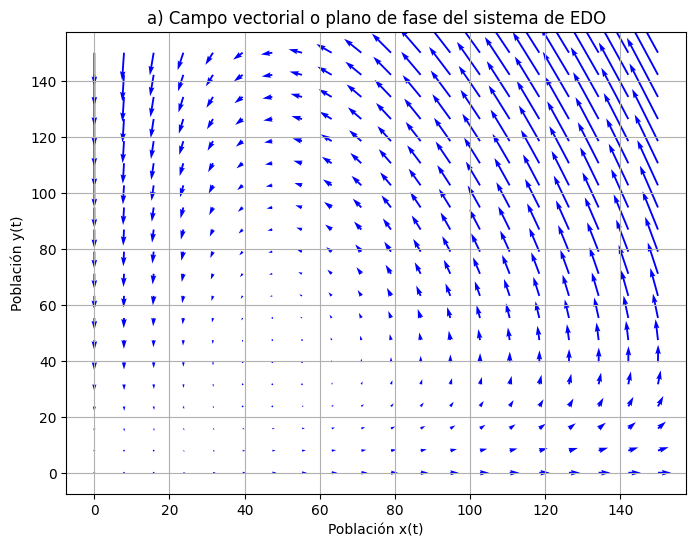

b) Puntos de equilibrio: [(0.0, 0.0), (50.0000000000000, 40.0000000000000)]


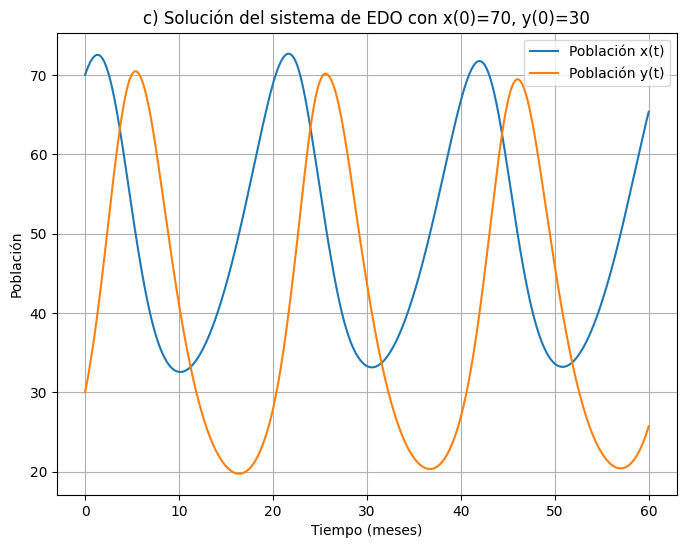

c) Población después de 5 años: x = 65.35, y = 25.72


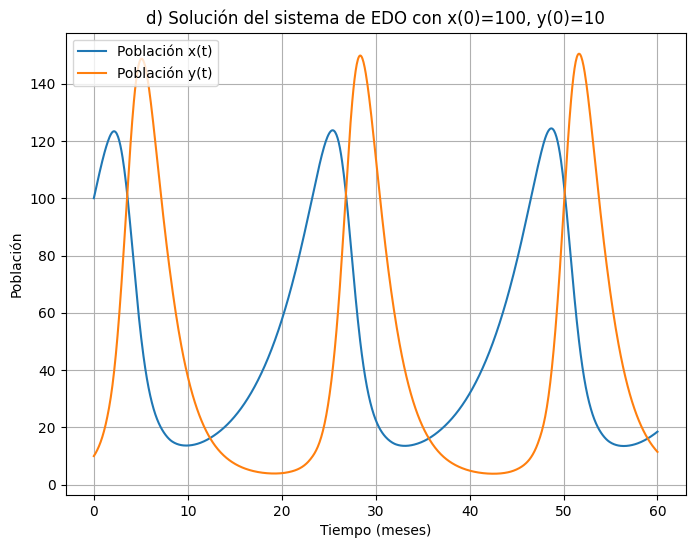

d) Población después de 5 años: x = 18.52, y = 11.46


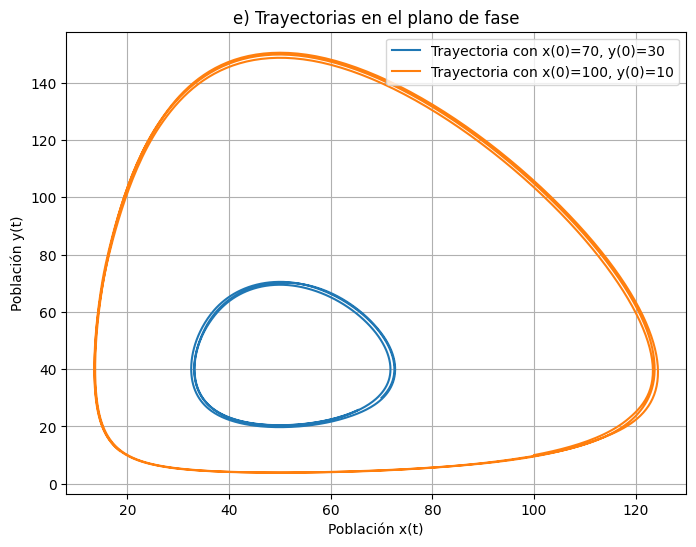

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from sympy import symbols, Eq, solve

# Definir el sistema de EDO
def system(t, z):
    x, y = z
    dxdt = 0.2 * x - 0.005 * x * y
    dydt = -0.5 * y + 0.01 * x * y
    return [dxdt, dydt]

# a) Graficar el campo vectorial o plano de fase
x_vals = np.linspace(0, 150, 20)
y_vals = np.linspace(0, 150, 20)
X, Y = np.meshgrid(x_vals, y_vals)
U = 0.2 * X - 0.005 * X * Y
V = -0.5 * Y + 0.01 * X * Y

plt.figure(figsize=(8, 6))
plt.quiver(X, Y, U, V, color="blue")
plt.xlabel('Población x(t)')
plt.ylabel('Población y(t)')
plt.title('a) Campo vectorial o plano de fase del sistema de EDO')
plt.grid(True)
plt.show()

# b) Encontrar los puntos de equilibrio


x, y = symbols('x y')
eq1 = Eq(0.2 * x - 0.005 * x * y, 0)
eq2 = Eq(-0.5 * y + 0.01 * x * y, 0)
equilibrio = solve((eq1, eq2), (x, y))
print(f"b) Puntos de equilibrio: {equilibrio}")

# c) Resolver el sistema de EDO usando Runge-Kutta con condiciones iniciales x(0)=70, y(0)=30
t_span = (0, 5*12)  # 5 años en meses
z0 = [70, 30]
sol = solve_ivp(system, t_span, z0, method='RK45', t_eval=np.linspace(0, 5*12, 1000))

plt.figure(figsize=(8, 6))
plt.plot(sol.t, sol.y[0], label='Población x(t)')
plt.plot(sol.t, sol.y[1], label='Población y(t)')
plt.xlabel('Tiempo (meses)')
plt.ylabel('Población')
plt.title('c) Solución del sistema de EDO con x(0)=70, y(0)=30')
plt.legend()
plt.grid(True)
plt.show()

poblacion_x_5_anios = sol.y[0][-1]
poblacion_y_5_anios = sol.y[1][-1]
print(f"c) Población después de 5 años: x = {poblacion_x_5_anios:.2f}, y = {poblacion_y_5_anios:.2f}")

# d) Repetir la solución con nuevas condiciones iniciales x(0)=100, y(0)=10
z0_d = [100, 10]
sol_d = solve_ivp(system, t_span, z0_d, method='RK45', t_eval=np.linspace(0, 5*12, 1000))

plt.figure(figsize=(8, 6))
plt.plot(sol_d.t, sol_d.y[0], label='Población x(t)')
plt.plot(sol_d.t, sol_d.y[1], label='Población y(t)')
plt.xlabel('Tiempo (meses)')
plt.ylabel('Población')
plt.title('d) Solución del sistema de EDO con x(0)=100, y(0)=10')
plt.legend()
plt.grid(True)
plt.show()

poblacion_x_5_anios_d = sol_d.y[0][-1]
poblacion_y_5_anios_d = sol_d.y[1][-1]
print(f"d) Población después de 5 años: x = {poblacion_x_5_anios_d:.2f}, y = {poblacion_y_5_anios_d:.2f}")

# e) Graficar ambas trayectorias en el plano de fase
plt.figure(figsize=(8, 6))
plt.plot(sol.y[0], sol.y[1], label='Trayectoria con x(0)=70, y(0)=30')
plt.plot(sol_d.y[0], sol_d.y[1], label='Trayectoria con x(0)=100, y(0)=10')
plt.xlabel('Población x(t)')
plt.ylabel('Población y(t)')
plt.title('e) Trayectorias en el plano de fase')
plt.legend()
plt.grid(True)
plt.show()

# f) Explicación cualitativa del comportamiento del sistema de poblaciones
#explicada en el documento
